In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB,CategoricalNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression
import seaborn as sns

In [12]:
df = pd.read_csv('/content/titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
df.drop(columns=['Cabin'],inplace=True)
df.dropna(inplace=True)

In [16]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
df=pd.get_dummies(df,columns=['Sex','Embarked'])
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,True,False,False,True,False
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,False,True,True,False,False


In [18]:
x = df.drop(columns=['Survived', 'Name', 'Ticket'])
y = df['Survived']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)


The accuracy score is:  63.63636363636363
The train score is:  68.54130052724078
The test score is:  63.63636363636363
              precision    recall  f1-score   support

           0       0.63      0.84      0.72        80
           1       0.65      0.38      0.48        63

    accuracy                           0.64       143
   macro avg       0.64      0.61      0.60       143
weighted avg       0.64      0.64      0.61       143



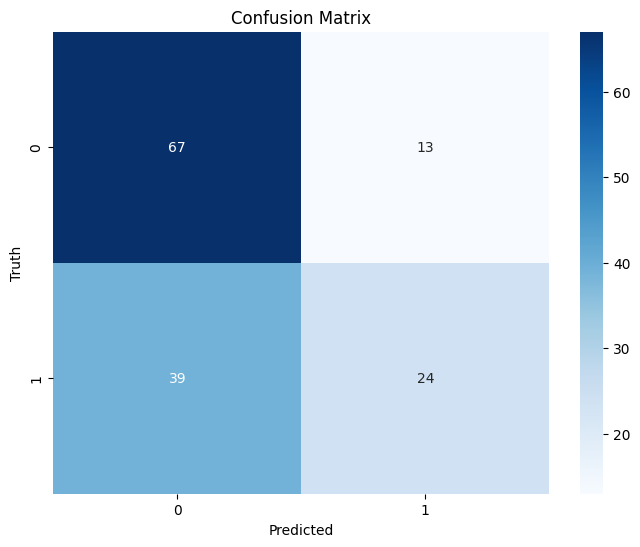

In [20]:
kn = KNeighborsClassifier(n_neighbors=13)
kn.fit(x_train,y_train)
y_pred_kn= kn.predict(x_test)
print("The accuracy score is: ",accuracy_score(y_test,y_pred_kn)*100)
print("The train score is: ", kn.score(x_train,y_train)*100)
print("The test score is: ",kn.score(x_test,y_test)*100)
print(classification_report(y_test,y_pred_kn))

cm3 = confusion_matrix(y_test,y_pred_kn)
plt.figure(figsize=(8,6))
sns.heatmap(cm3,annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [21]:
Lo = LogisticRegression(max_iter=90000)
Lo.fit(x_train, y_train)
y_pred_lo = Lo.predict(x_test)
accuracy_score(y_test, y_pred_lo)

0.8111888111888111

In [22]:
svc = SVC(C=5)
svc.fit(x_train,y_train)
y_pred_svc= svc.predict(x_test)
print("The accuracy score is: ", accuracy_score(y_test, y_pred_svc)*100)
print("The train score is: ",svc.score(x_train,y_train)*100)
print("The test score is: ", svc.score(x_test,y_test)*100)
print(classification_report(y_test,y_pred_svc))

The accuracy score is:  67.13286713286713
The train score is:  68.18980667838312
The test score is:  67.13286713286713
              precision    recall  f1-score   support

           0       0.64      0.95      0.76        80
           1       0.83      0.32      0.46        63

    accuracy                           0.67       143
   macro avg       0.74      0.63      0.61       143
weighted avg       0.72      0.67      0.63       143



In [23]:
model = GaussianNB()
model.fit(x,y)
print("Accuracy = ",accuracy_score(y,model.predict(x))*100)
print(classification_report(y,model.predict(x)))

Accuracy =  77.9494382022472
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       424
           1       0.73      0.72      0.73       288

    accuracy                           0.78       712
   macro avg       0.77      0.77      0.77       712
weighted avg       0.78      0.78      0.78       712

